# Tutorial 5
## Outline
* Auto-differentiation frameworks: tensorflow and pytorch
* Nomenclatures and general components of training a NN
* PyTorch Tensors
* Building an NN with pytorch


## Tenserflow vs PyTorch
![title](tf.pytorch.jpg)

* PyTorch is developed by Facebook
* TensorFlow is developed by Google. Keras is a front-end API of TensorFlow.

### Similarities
* Both are auto-differentiation framework
* Both are open source
* Both support CPU and GPU executions
* Both have a large and active community

### Dissimilarities
#### Graph structure
* Depending on version, TensorFlow is either static graph (version 1) or dynamic graph (version 2, with eager execution), but not as efficient as static graph
* PyTorch is completely dynamic graph, and is efficient (sometimes even more efficient than TF with static graph!)


#### Language support
* TensorFlow supports a large variety of languages, i.e. C++, JavaScript, Python, C#, Ruby, and Swift.
* PyTorch only supports python

#### Debugging easiness
* Generally speaking, TensorFlow is harder to debug in python, especially in TF1, since the graph structure is not dynamically defined as a python object, and any internal error is hard to capture
* TF2 improves on this, by allowing eager execution of the graph. But when converting back to static graph, there might still be issues
* PyTorch is easy to debug in python. You can use your favourite python debug tool and execute PyTorch operations line by line
* You can also register hooks in PyTorch to to better understand and control the gradient in the graph

#### Deployment
* Tensorflow can be easily deployed into different platforms, including mobile devices!
* PyTorch code has to be converted into a different framework for depolyment

### General suggestions
* TensorFlow (with Keras) is easier to use for trying out existing models on a new dataset with minimal modifications on the architecture
* It is also good for building simple models, like MLP networks 
* PyTorch is more useful in research, when you would like to try complicated NN architectures and needs to do a lot of debuggingg and validation of ideas, but do not care about deployment

## Nomenclatures and general components of training a NN
* **Epoch**: Going through training data once
* **Batch**: Set of data for calculating each gradient update
* **Batch size**: Size of data in a batch
* **Iteration**: One iteration = one gradient update
* **Learning rate**: Coefficient multiplied to the gradient in each update

### Neural network architecture
* Multiple layer perceptron (MLP)
* Convolutional neural network (CNN)
* Graph convolutional neural network (GCN)
* Recurrent neural network (RNN)
* AutoEncoder (AE) 
* Attention mechanism / Transformer 
* ...

### Optimizer
* SGD (SGDM)
* Adam
* RMSProp
* ...

### Loss function
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Cosine similarity 
* Binary crossentropy (CE) 
* Categorical crossentropy
* ...

## PyTorch: Tensors

Here we introduce the most fundamental PyTorch concept: the **Tensor**. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

In [3]:
import torch
import numpy as np

a = torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])
a.size()[1]

2

In [4]:
a.reshape(-1)

tensor([0.1000, 1.2000, 2.2000, 3.1000, 4.9000, 5.2000])

In [6]:
x = torch.linspace(-np.pi,np.pi,20)
x

tensor([-3.1416, -2.8109, -2.4802, -2.1495, -1.8188, -1.4881, -1.1574, -0.8267,
        -0.4960, -0.1653,  0.1653,  0.4960,  0.8267,  1.1574,  1.4881,  1.8188,
         2.1495,  2.4802,  2.8109,  3.1416])

Convert numpy array to torch and vice versa

In [8]:
a = np.ones((3,2))
a


array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [11]:
b=torch.tensor(a,dtype=torch.int)

In [13]:
b.detach().numpy()

array([[1, 1],
       [1, 1],
       [1, 1]], dtype=int32)

Specify the device and data types for torch tensors

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dtype = torch.float
a= torch.randn((2,3),device = device,dtype=dtype)


In [16]:
a.to(torch.device('cpu'))

tensor([[-0.4189,  0.2078, -0.5022],
        [ 1.8856,  0.1340, -0.6144]])

## Building NN for regression task
For example, let's use a two hidden-layer MLP network [20, 15, 1] to simulate the Rosenbrock banana function!<br>
$f(x,y)=(1-x)^2+10(y-x^2)^2$<br>
$x\in[-2,2],y\in[-2,2]$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

def generate_X(number):
    xs=(np.random.random(number)*2-1)*2
    ys=(np.random.random(number)*2-1)*2
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)])
    
def generate_data(number,stochascity=0.05):
    X=generate_X(number)
    xs=X[:,0]
    ys=X[:,1]
    fs=(1-xs)**2+10*(ys-xs**2)**2
    stochastic_ratio=(np.random.random(number)*2-1)*stochascity+1
    return np.hstack([xs.reshape(-1,1),ys.reshape(-1,1)]),fs*stochastic_ratio

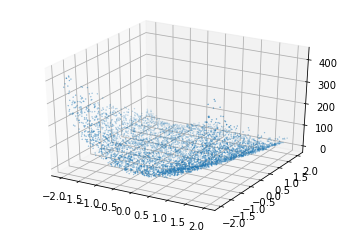

In [18]:
x, y = generate_data(5000, 0.3)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x[:, 0], x[:, 1], y, s=0.1)

### Building a PyTorch model

In [22]:
from torch import nn
import torch

class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.layers = nn.Sequential(
        nn.Linear(2,20),
        nn.ReLU(),
        nn.Linear(20,15),
        nn.ReLU(),
        nn.Linear(15,1)
        )
        
    def forward(self,x):
        return self.layers(x)

In [23]:
model = MLP()
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=1, bias=True)
  )
)


In [26]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)

for i in range(100):
    train_X, train_y = generate_data(128, stochascity=0.1)
    train_X = torch.tensor(train_X, dtype=torch.float)
    train_y = torch.tensor(train_y, dtype=torch.float)
    pred = model(train_X)
    loss = loss_func(pred,train_y.reshape(-1,1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("Iteration %d: Loss value - %.4f" % (i + 1, loss.item()))

Iteration 1: Loss value - 5872.9624
Iteration 2: Loss value - 5322.2246
Iteration 3: Loss value - 4985.7695
Iteration 4: Loss value - 4751.5938
Iteration 5: Loss value - 9796.4131
Iteration 6: Loss value - 5614.3652
Iteration 7: Loss value - 6225.0088
Iteration 8: Loss value - 5176.1992
Iteration 9: Loss value - 4389.3232
Iteration 10: Loss value - 6579.1465
Iteration 11: Loss value - 3785.8340
Iteration 12: Loss value - 5523.1738
Iteration 13: Loss value - 6225.8770
Iteration 14: Loss value - 6775.0005
Iteration 15: Loss value - 4850.0405
Iteration 16: Loss value - 7663.7437
Iteration 17: Loss value - 4311.2334
Iteration 18: Loss value - 5085.7471
Iteration 19: Loss value - 5521.5928
Iteration 20: Loss value - 6629.8022
Iteration 21: Loss value - 4841.0977
Iteration 22: Loss value - 5929.7808
Iteration 23: Loss value - 5295.5962
Iteration 24: Loss value - 4472.2095
Iteration 25: Loss value - 4707.4575
Iteration 26: Loss value - 5782.6631
Iteration 27: Loss value - 5973.0977
Iteration 

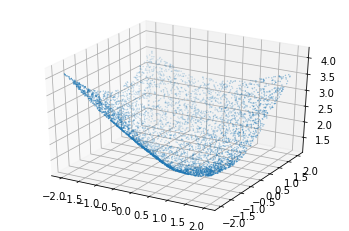

In [25]:
new_X = generate_X(5000)
with torch.no_grad():
    new_y = model(torch.tensor(new_X,dtype=torch.float))
new_y = new_y.detach().numpy()
fig = plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_y, s=0.1)